In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'final_report.csv')
df

,PositionQuantity,AvgPrice,Return,Capital,MarketPrice
0,0.0,0.000000,0.00,10000.00,151.78
1,0.0,0.000000,0.00,10000.00,153.64
2,0.0,0.000000,0.00,10000.00,157.74
3,0.0,0.000000,0.00,10000.00,156.96
4,0.0,0.000000,0.00,10000.00,156.57
...,...,...,...,...,...
495,8.0,187.090000,-560.13,9033.24,186.71
496,11.0,186.721818,-557.22,8476.02,185.74
497,14.0,186.734286,-560.34,7915.68,186.78
498,17.0,188.238824,-585.78,7329.90,195.26


### 1. Total Return

In [4]:
df['Absolute_Return'] = (df['PositionQuantity'] * df['MarketPrice']) + df['Capital'] - 10000
df['Periodic_Return'] = df['Absolute_Return'] / 10000
df

,PositionQuantity,AvgPrice,Return,Capital,MarketPrice,Absolute_Return,Periodic_Return
0,0.0,0.000000,0.00,10000.00,151.78,0.00,0.000000
1,0.0,0.000000,0.00,10000.00,153.64,0.00,0.000000
2,0.0,0.000000,0.00,10000.00,157.74,0.00,0.000000
3,0.0,0.000000,0.00,10000.00,156.96,0.00,0.000000
4,0.0,0.000000,0.00,10000.00,156.57,0.00,0.000000
...,...,...,...,...,...,...,...
495,8.0,187.090000,-560.13,9033.24,186.71,526.92,0.052692
496,11.0,186.721818,-557.22,8476.02,185.74,519.16,0.051916
497,14.0,186.734286,-560.34,7915.68,186.78,530.60,0.053060
498,17.0,188.238824,-585.78,7329.90,195.26,649.32,0.064932


In [5]:
total_return = df.iloc[-1, -1]
print('Total Return: ', total_return)

Total Return:  0.06154900000000089


### 2. Periodic Return

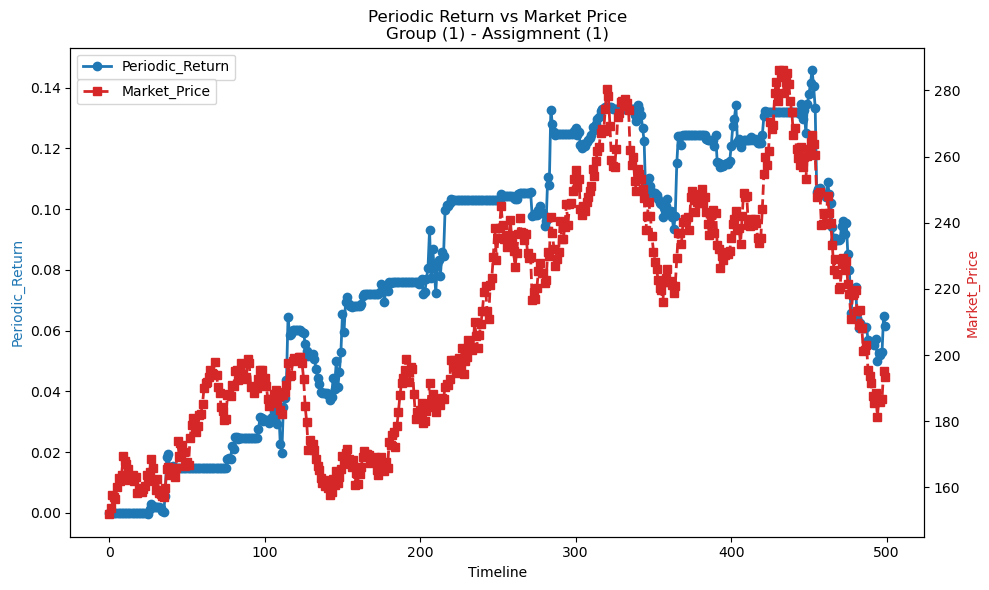

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.index, df['Periodic_Return'], color='tab:blue', marker='o', linewidth=2, label='Periodic_Return')
ax2 = ax1.twinx()
ax2.plot(df.index, df['MarketPrice'], color='tab:red', marker='s', linestyle='--', linewidth=2, label='Market_Price')

ax1.set_xlabel('Timeline')
ax1.set_ylabel('Periodic_Return', color='tab:blue')
ax2.set_ylabel('Market_Price', color='tab:red')
ax1.set_title('Periodic Return vs Market Price\nGroup (1) - Assigmnent (1)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left',bbox_to_anchor=(0, 0.95))

plt.tight_layout()
plt.show()

### 3. Sharpe Ratio

#### Across those 500 datapoints, we used period = 3 to define 3 data points as 1 calendar day. Therefore, the total number of days is roughly 167 days for this Algo. To compare, we took 2025 180 days U.S. Treasury Bill return, which is close to 0.0417 as proxy of risk free rate. 

#### In addition, the Algo didn't start to run until the 25th data point, therefore, we tried to use df.iloc[25:, -1] to calculate return volatility. 

In [11]:
sharpe_ratio = (total_return - 0.0417) / df.iloc[25:, -1].std()
print('Sharpe Ratio: ', sharpe_ratio)

Sharpe Ratio:  0.48882979307176144


### 4. Maximum Drawdown

In [13]:
mdd = (df.iloc[-100:, -1].max() - df.iloc[-100:, -1].min()) / df.iloc[-100:, -1].max()
print('Maximum Drawdown: ', mdd)

Maximum Drawdown:  0.6573655740739436


### 5. Generate md File

In [15]:
plot_filename = "TrendingPerformance.png"
fig.savefig(plot_filename, bbox_inches='tight')

df_markdown = df.to_markdown(index=False)

intro_text = "# Group1 Report\n\nIn this Algo, we implemented momentum trading strategy combined with Moving Average Crossover strategy, along with the loss stop rate to be 0.03 and risk to be 15% of current capital to control the risk."
content_text = "\n\n## Momentum Strategy\n\nIn the Momentum Strategy, we defined 3 data points as 1 trading day and 15 days as window to calculate ADX and RSI.\n\n## Moving Average Crossover Strategy\n\nIn Moving Average Crossover Strategy, we used 5 datapoints as slow period and 25 datapoints as fast period.\n\n## Risk Control\n\nIn addition to the 0.03 loss stop, we've also conducted the simple average of the suggested position sizing from both Momentum strategy and Moving Average Crossover strategy to avoid skewed jump or drop from single algorithm."

In [16]:
markdown_filename = "performance.md"

with open(markdown_filename, "wt") as md_file:
    md_file.write(intro_text)
    md_file.write(content_text)
    md_file.write("\n\n# Performance Report\n\n")
    md_file.write("## Metrics Table\n\n")
    md_file.write(df_markdown)
    md_file.write("\n\n## Trending Performance Plot\n\n")
    md_file.write(f"![{plot_filename}]({plot_filename})\n")

### 6. Generate README.md

In [18]:
read_me = "# README\n\n## Python Version\n\nIn the python file, we've used Numpy == 2.4.1 and Pandas == 2.3.3.\n\n## Parameters\n\nWe've put the parameters in main.py so that each aspects can be modified accordingly.\n\n## Execution\n\nTo run the whole Algorithm, please put all python file under the same folder directory, make sure the Numpy and Pandas version are correct and then run the main.py. \nmain.py will run the algo and save the results into 'final_report.csv', then using performance.ipynb will generate the performance md file report. Thank you."

In [19]:
markdown_filename = "README.md"

with open(markdown_filename, "wt") as md_file:
    md_file.write(read_me)